### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [11]:
import numpy as np
import math 

m = np.arange(12).reshape((3,4))
# le parentesi quadre individuano diverse righe quando definisco un array. Quando racchiudo in due parentesi quadre sto poi aggiungendo una dimensione agli array 
# in questo modo l'array diventa una matrice tre righe e quattro colonne 
# per trovare la media posso sfruttare la funzione sum() e il metodo .shape per restituire il numero di righe e colonne
row_mean = m.sum(axis = 0)/m.shape[0] # specificando l'asse inteso come dimensione su cui eseguire la somma
coloumn_mean = m.sum(axis = 1)/m.shape[1]
# per sommare tutti gli elementi dell'array utilizzo la funzione sum della classe numpy e per contare tutte le componenti di un array posso moltiplicare le dimensioni che provengono dall'output di .shape
number = 1
for dim in m.shape : number *= dim
overall_mean = np.sum(m)/number
print("means of rows, coloumns and overall elements are",row_mean,coloumn_mean,overall_mean)




means of rows, coloumns and overall elements are [4. 5. 6. 7.] [1.5 5.5 9.5] 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operations


In [ ]:
# usando il broadcasting senza bisogno di aggiungere una dimensione a v 
u = np.array([1,3,5,7])
u[:,np.newaxis]
v = np.array([2,4,6,8])


In [3]:
# per prodotto esterno dei due vettori u e v si indica il prodotto che restituisce a partire da un vettore colonna e un vettore riga una matrice n righe per m colonne 
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
outerp_1 = np.outer(u,v)
outerp_2 = np.array([i*j for i in u for j in v]).reshape(len(u),len(v))
# l'ultimo metodo per calcolare il prodotto esterno è il broadcasting. Si potrebbero completare i due array rendendoli due matrici ed eseguire il prodotto riga colonna tramite il metodo dot. Il primo array dovrebbe avere tante colonne quanto ne ha il secondo non modificato. Così il secondo modificato dovrebbe avere tante righe quante quelle del primo non modificato.
# Oppure si può aggiungere una dimensione a ciascuno dei due vettori in modo che 
outerp_3 = u[:,np.newaxis]*v[np.newaxis,:]
print(outerp_1,"\n",outerp_2,"\n",outerp_3)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [4]:
import numpy.random as npr
npr.seed(123) # è necessario fissare il seed da cui sono creati i numeri casuali per poter avere risultati riproducibili
# Innanzitutto creo una matrice di random uniform numbers. Poi userò una mask per settare quelle righe che hanno elementi minori di 0.1 uguali a zero
rand = npr.rand(10,6)
#rand[rand < 0.1] = 0
# in questo modo filtro elementwise ma qui si chiede di settare eventualmente tutta una riga a zero se anche uno dei suoi elementi dovesse essere minore di 0.1, si può utilizzare allora np.any con la dimensione axis = 0 per applicare la maschera interamente ad una colonna restituendo o solo true o solo false infatti
# any e all sono come gli operatori and e or applicati a tutta la riga. Se mi serve capire se tutti gli elementi soddisfino una condizione allora utilizzo all, se invece anche se solo uno non la soddisfa posso avere false uso any
mask = rand < 0.1
rand[mask.any(axis = 1)] = 0
print(rand)

[[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319  0.39211752 0.34317802 0.72904971]
 [0.         0.         0.         0.         0.         0.        ]
 [0.53155137 0.53182759 0.63440096 0.84943179 0.72445532 0.61102351]
 [0.72244338 0.32295891 0.36178866 0.22826323 0.29371405 0.63097612]
 [0.         0.         0.         0.         0.         0.        ]
 [0.42635131 0.89338916 0.94416002 0.50183668 0.62395295 0.1156184 ]
 [0.31728548 0.41482621 0.86630916 0.25045537 0.48303426 0.98555979]
 [0.51948512 0.61289453 0.12062867 0.8263408  0.60306013 0.54506801]
 [0.34276383 0.30412079 0.41702221 0.68130077 0.87545684 0.51042234]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

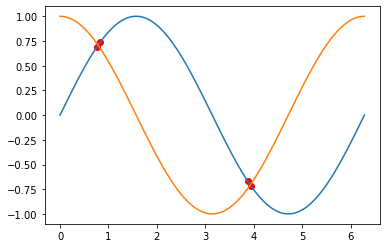

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

# creo un array di 100 numeri tra o e 2pi+1 
x = np.linspace(0,2*np.pi,100)
print(x) # questo è l'array completa senza alcuna modifica
print(x[::10]) # questo selezione ogni dieci elementi dall'array a 
print(x[::-1]) # tramite lo step -1 torno indietro
print(x[np.abs(np.sin(x)-np.cos(x)) < 0.1]) # tramite una mask estraggo solo gli elementi la cui differenza in abs tra sin(a) e cos(a) sia minore di 0.1
plt.plot(x,np.sin(x),x,np.cos(x))
# mi si chiede anche di mostrare quando le due funzioni sono vicine, posso sfruttare l'array x ricavato dalla terza condizione e rappresentare questi punti singolarmente nel grafico. La soglia epsilon quindi è settata a 0.1
xclose = x[np.abs(np.sin(x)-np.cos(x)) < 0.1]
plt.scatter(xclose,np.sin(xclose), c = "red")

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [6]:
mult = np.array([i*j for i in range(1,11) for j in range(1,11)]).reshape(10,10)
print("the trace:",np.trace(mult))
# adesso mult è una griglia 10 per 10 
print(mult)
print(np.diag(mult[:,::-1])) # in questo modo ho riscritto la matrice con lo stesso ordine delle righe ma le colonne scambiate (avrei potuto fare anche stesse colonne ma righe scambiate tanto è simmetrica)
# per selezionare gli elementi diagonali ma di una riga e colonna successive vorrei usare un filtro che rappresenti una delta di kronecker deltai,j+1. Potrei provare a creare una lista con gli indici da selezionare come una sorta di mask
#la lista deve essere fatta di tuples di due elementi (i,j) che dati in pasto all'array iniziale mi selezionino solo gli elementi buoni
mask = [(i-1,i) for i in range (1,10)] # esattamente come una delta di kron, ma per evitare l'out of bounds dell'ultima tuple devo far correre range da 1 a 10, così l'ultima riga non viene contata perchè nella diagonale superiore non entra in gioco
print(np.array([mult[l] for l in mask]))
print(np.diag(mult,1)) # praticamente selezione la diagonale superiore rispetto a quella canonica dell'array mult


the trace: 385
[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
[10 18 24 28 30 30 28 24 18 10]
[ 2  6 12 20 30 42 56 72 90]
[ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [7]:
dist = np.array([0,198,303,736,871,1175,1475,1544,1913,2448])
# praticamente aggiungendo una dimensione con np.newaxis nelle colonne faccio in modo che il vettore iniziale diventi colonna ma con le altre colonne disponibili. Mentre dist.T sarà il vettore trasposto
dist = dist[:,np.newaxis]
print("        ",dist.T,"\n",dist)
# bisogna creare una griglia con le distanze reciproche tra le città
print(np.abs(dist-dist.T),"\n")
print(np.abs(dist-dist.T)*1.61) # in km 

         [[   0  198  303  736  871 1175 1475 1544 1913 2448]] 
 [[   0]
 [ 198]
 [ 303]
 [ 736]
 [ 871]
 [1175]
 [1475]
 [1544]
 [1913]
 [2448]]
[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]] 

[[   0.    318.78  487.83 1184.96 1402.31 1891.75 2374.75 2485.84 3079.93
  3941.28]
 [ 318.78    0.    169.05  866.18 1083.53 1572.97 2055.97 2167.06 2761.15
  3622.5 ]
 [ 487.83  169.05    0.    697.13  914.48 1403.92 1886.92 1998.01 2592.1
  3453.45]
 [1184.96  866.18  697.13    0.    217.35  706.79 1189.79 1300.88 1

In [8]:
# Questa è una prova che ho deciso di lasciare per capire come funzionasse il comando newaxis
a = np.array([1,0])
a = a[:,np.newaxis]
a+a.T
# come se ci fossero degli zeri quando aggiungiamo una dimensione, disponibili per le operazioni elementwise 

array([[2, 1],
       [1, 0]])

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [9]:
# prima di tutto si costruisce la mask per il sieve 
N = 100
mask = np.ones((N,),bool)
# bisogna partire dal primo numero primo cioè 2 quindi imponiamo manualmente che
mask[0] = mask[1] = False # in questo modo la mask selezionerà i numeri che non resituiscono true
# ora è necessario cambiare il valore in false per quei punti della maschera corrispondenti a multipli di p, dove p parte da due e arriva fino alla radice quadrata di N
a = np.arange(0,N)
# bisogna adattare la maschera in modo che partendo da due (a[1]) tutti i suoi multipli vengono "segnati", poi si incrementa il punto 
def prime(num,m,n) :
    for i in range(2,n) :
        m[2*i::i] = False # a passi di i vengono segnati i non primi, è necessario inoltre che a parta da zero in modo che l'indexing sia compatibile con la serie di numeri in a
    return num[m]
def prime_1(num,m,n) :
    for i in range(2,int(n/2)) :
        m[2*i::i] = False
    return num[m]

%timeit prime(a,mask,N)
%timeit prime_1(a,mask,N)
print("prime numbers from 0 to",N,"are\n",prime(a,mask,N),"\n",prime_1(a,mask,N))
# per capire come cambiano le performance al variare di N incrementiamo di un ordine di grandezza
for n in [k*N for k in range(1,3)] :
    %timeit prime(a,mask,n)
    %timeit prime_1(a,mask,n)

70.7 µs ± 6.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
28.7 µs ± 423 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
prime numbers from 0 to 100 are
 [ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97] 
 [ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
65.3 µs ± 6.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
29.9 µs ± 2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
145 µs ± 9.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
63.3 µs ± 7.99 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

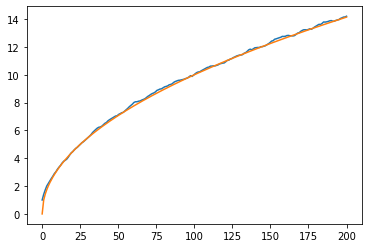

In [14]:
# bisogna simulare tanti walkers e considerare ciascuno di loro in una riga di un array insieme alla propria evoluzione temporale. Siano 1000 ognuno che si muove in 200 steps
import numpy.random as npr
import matplotlib.pyplot as plt
npr.seed(123) 
walkers = np.array([npr.choice([-1,1]) for i in range(0,200000)]).reshape(1000,200)
# così ho creato una matrice 1000x200 contenente -1 e 1 uniformemente distribuiti
# adesso bisogna costruire un array contenente la somma di ciascuna riga 
# walkers.sum(axis = 1) è la somma effettuata per ogni riga al variare dunque dell'indice di colonna anche perchè i walkers sono in totale 1000. Corrisponde alla loro posizione finale
# bisogna invece costruire una matrice in cui le righe rimangono invariate e al posto della seconda colonna si scrive la seconda più la precedente fino alla 200-esima 
for i in range(1,200) : #la prima colonna deve rimanere invariata
    walkers[:,i] += walkers[:,i-1]  
# infine calcolo la media delle posizioni ad ogni istante (colonna) cioè iterando l'indice di riga. Uso la funzione mean specificando la dimensione axis = 0 cioè la media è effettuata variando le righe per ogni colonna
means = np.mean(walkers**2, axis = 0)
%matplotlib inline
t = np.linspace(0,200,200) # l'ultimo argomento sono il numero di punti 
# essendo il vettore sqrt(means) normalizzato rappresentandolo in funzione del tempo e confrontandolo con la radice qaudrata del vettore t mi aspetto che i due plot siano compatibili 
plt.plot(t,np.sqrt(means),t,np.sqrt(t))

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]
The main statistical properties for hares are:
sum 715700.0
min 7600.0
argmin 17
mean 34080.95238095238
median 25400.0
std 20897.906458089667
The main statistical properties for lynxes are:
sum 423500.0
min 4000.0
argmin 0
mean 20166.666666666668
median 12300.0
std 16254.591536908763
The main statistical properties for carrots are:
sum 890400.0
m

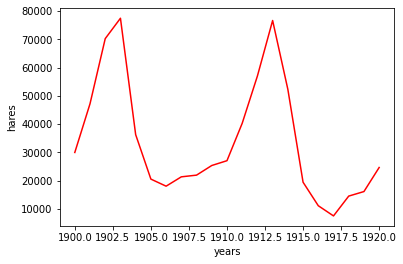

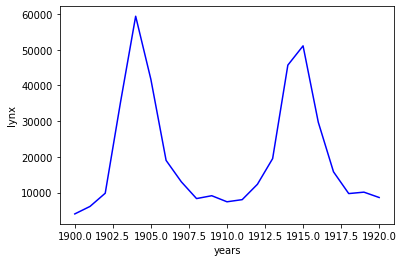

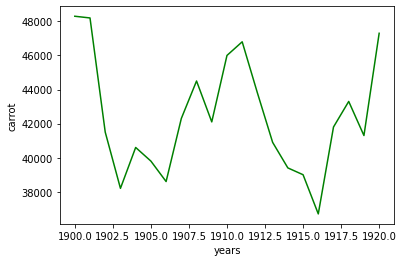

In [15]:
import numpy as np
import matplotlib.pyplot as plt


population = np.loadtxt("populations.txt", skiprows=1)
print(population) # per capire se i dati sono stati acquisiti in modo corretto dal file di testo 

year = population[:,0]
hares = population[:,1]
lynxes = population[:,2]
carrots = population[:,3]
# ho selezionato le quattro colonne come array di dati 
# per averli in tre figure diverse scrivo
plt.figure()
plt.plot(year,hares, 'r')
plt.xlabel('years')
plt.ylabel('hares')

plt.figure()
plt.plot(year,lynxes, 'b')
plt.xlabel('years')
plt.ylabel('lynx')

plt.figure()
plt.plot(year,carrots, 'g')
plt.xlabel('years')
plt.ylabel('carrot')

print("The main statistical properties for hares are:")
for function in ['sum','min','argmin','mean','median','std']:
    print (function, getattr(np, function)(hares)) # la funzione getattr interpreta le stringhe che legge da una lista come funzioni che poi applica all'argomento nella seconda parentesi tonda
print("The main statistical properties for lynxes are:")
for function in ['sum','min','argmin','mean','median','std']:
    print (function, getattr(np, function)(lynxes)) 
print("The main statistical properties for carrots are:")
for function in ['sum','min','argmin','mean','median','std']:
    print (function, getattr(np, function)(carrots))
    
titles=['Hares','Lynxes','Carrots']   
print("Max populations over years")
for i in population : # leggendo i dati scorro tra le righe degli array
    print(int(i[0]),":",titles[np.argmax(i[1:])])